In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import itertools

%pylab inline

from statsmodels.stats.proportion import proportion_confint, proportions_ztest, \
confint_proportions_2indep, test_proportions_2indep

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('credit_card_default_analysis.csv')
df

,ID,LIMIT_BAL,GENDER,EDUCATION,MARITAL,AGE,PAY_SEP,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_JUN,BILL_MAY,BILL_APR,PAY_SEP.1,PAY_AUG.1,PAY_JUL.1,PAY_JUN.1,PAY_MAY.1,PAY_APR.1,default
0,1,20000,2,2,1,24,2,2,0,0,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,0,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,0,0,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,0,0,0,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [3]:
df_1 = df[df['default'] == 1] #default
df_0 = df[df['default'] == 0] #non-default

# 1
* Credit limit: test whether there are differences between median credit limits of two groups.

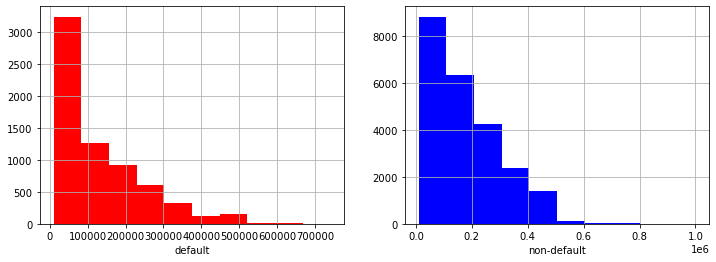

In [4]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(df_1['LIMIT_BAL'], color = 'r')
pylab.xlabel('default')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(df_0['LIMIT_BAL'], color = 'b')
pylab.xlabel('non-default');

In [5]:
print('mean 1 =', np.mean(df_1['LIMIT_BAL']))
print('median 1 =', np.median(df_1['LIMIT_BAL']))

mean 1 = 130109.65641952984
median 1 = 90000.0


In [6]:
print('mean 0 =', np.mean(df_0['LIMIT_BAL']))
print('median 0 =', np.median(df_0['LIMIT_BAL']))

mean 0 = 178099.72607430234
median 0 = 150000.0


2 independent samples, seem to be skewed. As we are interested only in equality of medians and not in absolute scale of inequality, it's ok to use Mann-Whitney test.  
H0: Fx1(x) = Fx2(x)  
H1: Fx1(x) = Fx2(x+delta)

In [7]:
print("Mann-Whitney test:", stats.mannwhitneyu(df_0['LIMIT_BAL'], df_1['LIMIT_BAL']))

Mann-Whitney test: MannwhitneyuResult(statistic=95786286.5, pvalue=1.2255485818223303e-189)


**H0 is rejected at 0.05, median credit limits of two groups are not equal.**

# 2
* Gender: test whether gender composition of two groups differ.  
2 independent samples of 2 binary variables. We can test differences of 2 proportions using Z test of Wilson's test

𝐻_0 : $p_1=p_2$.  

𝐻_1 : $p_1!=p_2$.

([<matplotlib.axis.XTick at 0x217077466d0>,
 [Text(0, 0, 'm1'), Text(0, 0, 'f1'), Text(0, 0, 'm0'), Text(0, 0, 'f0')])

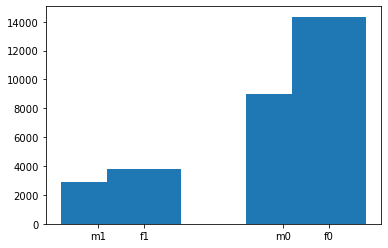

In [8]:
bar_heights = [len(df_1[df_1['GENDER']==1]), len(df_1[df_1['GENDER']==2]), 
               len(df_0[df_0['GENDER']==1]), len(df_0[df_0['GENDER']==2])]
bar_labels = ['m1', 'f1', 'm0', 'f0']
bar_x_positions = [0,0.5,2,2.5]

plt.bar(bar_x_positions, bar_heights)
plt.xticks(bar_x_positions, bar_labels)

In [9]:
print('p1', len(df_1[df_1['GENDER']==1])/len(df_1['GENDER']))
print('p0', len(df_0[df_0['GENDER']==1])/len(df_0['GENDER']))

p1 0.43294153104279687
p0 0.38585002568053417


In [10]:
print("Z test:", test_proportions_2indep(len(df_1[df_1['GENDER']==1]), len(df_1['GENDER']), len(df_0[df_0['GENDER']==1]), len(df_0['GENDER']), alternative = 'two-sided',
                                          method = 'wald',  return_results=False))

Z test: (6.858927391448388, 6.9379488648039966e-12)


In [11]:
print("Wilson's interval based test:", 
      test_proportions_2indep(len(df_1[df_1['GENDER']==1]), len(df_1['GENDER']), len(df_0[df_0['GENDER']==1]), len(df_0['GENDER']), alternative = 'two-sided', 
                              method = 'score', correction=False, return_results=False))

Wilson's interval based test: (6.921259731350102, 4.4764487319331085e-12)


**H0 is rejected at 0.05, gender composition of two groups differ.**

# 3
*  Education: test whether education levels differs between two groups. If it does, then how exactly?

2 independent samples of 1 binary, 1 categorical variables. We can built a contingency table and use Chi-squared test or permutation test

In [12]:
ct = pd.crosstab(df.default, df.EDUCATION)
ct

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,14,8549,10700,3680,116,262,43
1,0,2036,3330,1237,7,18,8


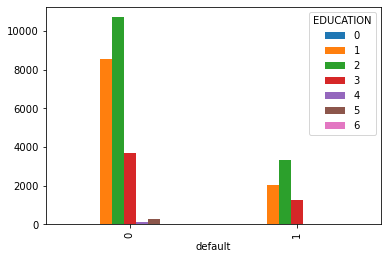

In [13]:
ct.plot(kind='bar')

Chi squared test for independence can't be used as there is zero people in one of the classes (<5). So it's better to use Permutation test for independence

$H_0$: education and default are independent

$H_1$: $H_0$ is false

In [14]:
np.random.seed(0)
def permutation_stat_cat_ind(sample1, sample2):
    ct = pd.crosstab(sample1, sample2)
    return stats.chi2_contingency(ct)[0]

def get_random_permutations(n, max_permutations=1000):
    index = np.array(range(n))
    indices = set([tuple(index)])        
    for i in range(max_permutations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return list(indices)

def permutation_null_dist_cat_ind(sample1, sample2, max_permutations = 1000):
    if not len(sample1) == len(sample2):
        raise ValueError("Samples should be paired and have the same size")
        
    n = len(sample1)
    
    if max_permutations:
        indices = get_random_permutations(n, max_permutations)
    else:
        indices = list(itertools.permutations(list(range(n))))
    
    distr = [permutation_stat_cat_ind(sample1, sample2[list(i)]) for i in indices]
    return distr

def permutation_test_cat_ind(sample1, sample2, max_permutations = 1000, return_distr = False):    
    t_stat = permutation_stat_cat_ind(sample1, sample2)
    
    null_distr = permutation_null_dist_cat_ind(sample1, sample2, max_permutations)
    
    p = sum([1. if x >= t_stat else 0. for x in null_distr]) / len(null_distr)
        
    if return_distr:
        return {'t': t_stat, 'p': p, 'null_distr': null_distr}
    else:
        return {'t': t_stat, 'p': p}
    
res= permutation_test_cat_ind(df.default.values, df.EDUCATION.values, 
                              max_permutations = 1000, return_distr = True)
print("Permutation test: t = %f, p = %f" % (res['t'], res['p']))

Permutation test: t = 163.216558, p = 0.001000


H0 is rejected at 0.05

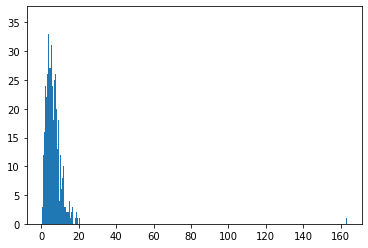

In [15]:
pylab.hist(res['null_distr'], bins = 700);

Standardized Pearson residuals

In [16]:
def st_pearson_residuals(ct):
    e = stats.chi2_contingency(ct)[3]
    r = e
    n_plus_j = sum(ct, axis=0)
    n_i_plus = sum(ct, axis=1)
    n = sum(n_plus_j)
    for i in range(len(n_i_plus)):
        for j in range(len(n_plus_j)):
            r[i,j] = (ct.values[i,j] - e[i,j]) / np.sqrt(e[i,j] * (1 - n_i_plus[i] / n) * (1 - n_plus_j[j] / n))
    return pd.DataFrame(data=r, index = ct.index, columns = ct.columns)
    

In [17]:
st_pearson_residuals(ct)

EDUCATION,0,1,2,3,4,5,6
default,,,,,,,
0,1.99455,8.890227,-6.316328,-5.612397,4.398948,6.355829,1.107928
1,-1.99455,-8.890227,6.316328,5.612397,-4.398948,-6.355829,-1.107928


**Seems that default people rarely have masters degree, but more likely to have bachelors degree or to be school graduate**

# 4
*  Marital status: Check how marital status is related to the default indicator: you need to propose a measure by which you can measure the possible relationship of these variables and calculate its value.

2 independent samples of 1 binary, 1 categorical variables. We can built a contingency table and use Chi-squared test or permutation test

Chi squared test for independence can be used as there is more then 5 people in each of the classes.

$H_0$: marital status and default are independent

$H_1$: $H_0$ is false

In [18]:
ct = pd.crosstab(df.default, df.MARITAL)
ct

MARITAL,0,1,2,3
default,,,,
0,49,10453,12623,239
1,5,3206,3341,84


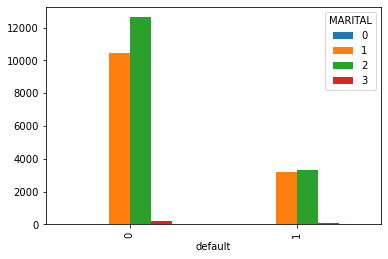

In [19]:
ct.plot(kind='bar')

In [20]:
stats.chi2_contingency(ct)

(35.66239583433609,
 8.825862457577375e-08,
 3,
 array([[4.20552000e+01, 1.06376292e+04, 1.24327632e+04, 2.51552400e+02],
        [1.19448000e+01, 3.02137080e+03, 3.53123680e+03, 7.14476000e+01]]))

𝑝=8.8×10−8<0.05  – H0 is rejected at 0.05.

In [21]:
st_pearson_residuals(ct)

MARITAL,0,1,2,3
default,,,,
0,2.279022,-5.157114,5.303433,-1.691884
1,-2.279022,5.157114,-5.303433,1.691884


**Seems that single people are rarely default unlike married, who are more likely to default**

# 5
*  Age: test whether there are differences between mean ages of clients in two groups.



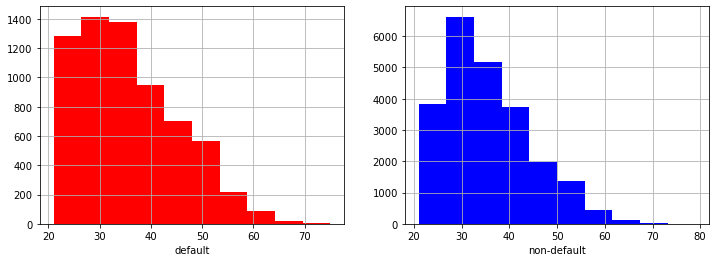

In [22]:
pylab.figure(figsize=(12,4))

pylab.subplot(1,2,1)
pylab.grid()
pylab.hist(df_1['AGE'], color = 'r')
pylab.xlabel('default')

pylab.subplot(1,2,2)
pylab.grid()
pylab.hist(df_0['AGE'], color = 'b')
pylab.xlabel('non-default');

In [23]:
print('mean 1 =', np.mean(df_1['AGE']))
print('median 1 =', np.median(df_1['AGE']))

mean 1 = 35.72573839662447
median 1 = 34.0


In [24]:
print('mean 0 =', np.mean(df_0['AGE']))
print('median 0 =', np.median(df_0['AGE']))

mean 0 = 35.417265879130284
median 0 = 34.0


2 independent samples, not really skewed. It's possible to use T test for means of 2 independent samples.

$H_0\colon$ average ages of default and non-default people are equal.

$H_1\colon$ not equal.

In [25]:
print('T test:', stats.ttest_ind(df_1.AGE, df_0.AGE, equal_var = False))

T test: Ttest_indResult(statistic=2.3195212416592628, pvalue=0.020386490255874648)


**H0 is rejected at 0.05, mean of ages between 2 groups are not equal**